In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.style.use('default')

/home/eirik/pyenvs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


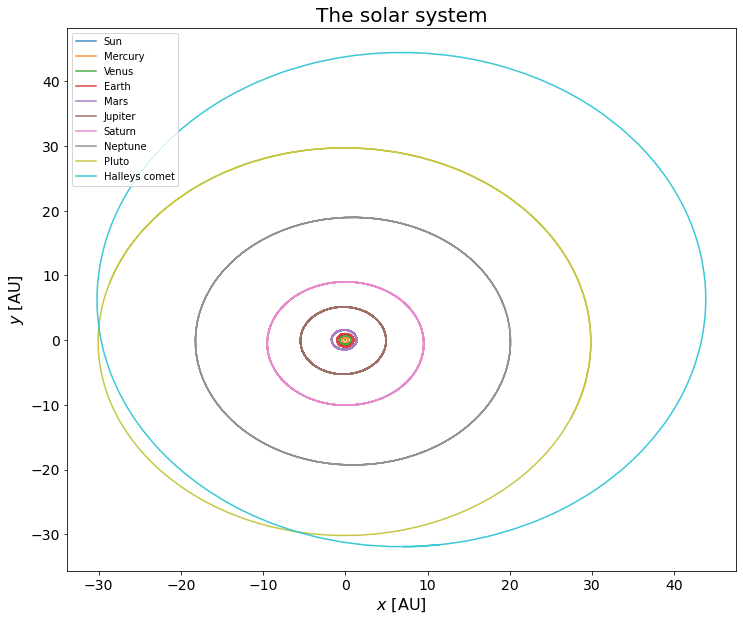

In [2]:
CelestialBodies = 11
N = np.linspace(0,4*(CelestialBodies-1),CelestialBodies)
names = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars',
         'Jupiter', 'Saturn', 'Neptune', 'Pluto', 'Halleys comet']

orbit_dict ={}
plt.figure(figsize=(12,10))
for j, name in zip(N, names):
    j = int(j)
    x, y, z = [], [], []
   
    infile = open("RK4Data.dat", 'r')
    for line in infile:           
        a = line.split() 
        x.append(float(a[j]))
        y.append(float(a[1+j]))
        z.append(float(a[2+j]))
    infile.close()
    orbit_dict[name] = {}
    orbit_dict[name]["x"] = x[::1]
    orbit_dict[name]["y"] = y[::1]
    orbit_dict[name]["z"] = z[::1]

    plt.plot(x, y, alpha=0.85, label=name)
plt.title('The solar system',fontsize=20)
plt.xlabel('$x$ [AU]',fontsize=16)
plt.ylabel('$y$ [AU]',fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


N = len(orbit_dict['Sun']["x"])

# Example data for demonstration; replace with actual orbit data
orbit_dict = {
    'Sun': {'x': orbit_dict['Sun']["x"], 
            'y': orbit_dict['Sun']["y"], 
            'z': orbit_dict['Sun']["z"]},
    'Earth': {'x': orbit_dict['Earth']["x"], 
              'y': orbit_dict['Earth']["y"], 
              'z': orbit_dict['Earth']["z"]},
    
}

# Create DataFrames for each planet
planets = ['Sun', 'Earth']

df_dict = {
    planet: pd.DataFrame({
        "time": np.arange(N),
        "x": orbit_dict[planet]["x"], 
        "y": orbit_dict[planet]["y"], 
        "z": orbit_dict[planet]["z"]
    })
    for planet in planets
}

# Define the update function for the animation
def update_graph(num):
    for planet, graph in graph_dict.items():
        data = df_dict[planet][df_dict[planet]['time'] == num]
        graph.set_data(data.x, data.y)
        graph.set_3d_properties(data.z)
    title.set_text(f'3D Test, time={num}')
    return [title] + list(graph_dict.values())

# Set up the figure and axis for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
ax.set_axis_off()

# Create initial plots for each planet and store them in a dictionary
graph_dict = {}
for planet, df in df_dict.items():
    data = df[df['time'] == 0]
    graph, = ax.plot(data.x, data.y, data.z, 
                     linestyle="", marker="o", label=planet)
    graph_dict[planet] = graph

# Create the animation
ani = matplotlib.animation.FuncAnimation(
    fig, update_graph, frames=N, interval=40, blit=False
)

# Save the animation as a GIF (ensure ImageMagick is installed)
ani.save('inner_orbits_animation.gif', writer='pillow', fps=2)

# Show the plot
plt.show()


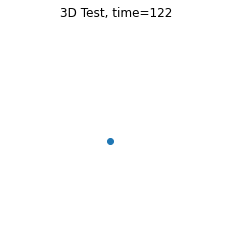

In [96]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd

df_sun = pd.DataFrame({"time": np.arange(N),
                   "x" : orbit_dict['Sun']["x"], 
                   "y" : orbit_dict['Sun']["y"], 
                   "z" : orbit_dict['Sun']["z"]})

def update_graph(num):
    data=df_sun[df_sun['time']==num]
    graph.set_data (df_sun.x, df_sun.y)
    graph.set_3d_properties(df_sun.z)
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
ax.set_axis_off()

data=df[df['time']==0]
graph, = ax.plot(df.x, df.y, df.z, linestyle="",  marker="o")

ani = matplotlib.animation.FuncAnimation(fig, update_graph, N-1, 
                               interval=40, blit=False)

ani.save('inner_orbits_animation.gif', 
         writer='imagemagick', 
         fps=25)
plt.show()

<ipython-input-78-f64893d2bef8>:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  sun_plot.set_data(orbit_dict['Sun']["x"][frame],
<ipython-input-78-f64893d2bef8>:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  mercury_plot.set_data(orbit_dict['Jupiter']["x"][frame],
<ipython-input-78-f64893d2bef8>:50: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  venus_plot.set_data(orbit_dict['Mars']["x"][frame],
<ipython-input-78-f64893d2bef8>:54: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  earth_plot.set_data(orbit_dict['Earth']["x"][frame],


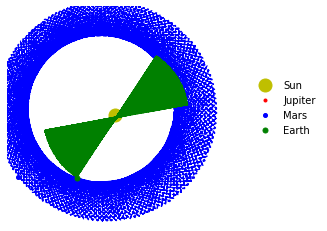

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample data: Sun and Earth coordinates over time
timesteps = len(orbit_dict['Sun']["x"])


# Set up the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# Plot elements for Sun and Earth
sun_plot, = ax.plot([], [], 'yo', markersize=13, label='Sun')
sun_trajectory, = ax.plot([], [], 'y--', lw=1)
mercury_plot, = ax.plot([], [], 'ro', markersize=3, label='Jupiter')
mercury_trajectory, = ax.plot([], [], 'r--', lw=1)
venus_plot, = ax.plot([], [], 'bo', markersize=4, label='Mars')
venus_trajectory, = ax.plot([], [], 'b--', lw=1)
earth_plot, = ax.plot([], [], 'go', markersize=5, label='Earth')
earth_trajectory, = ax.plot([], [], 'g--', lw=1)
plt.legend(bbox_to_anchor=(1.1,0.7), frameon=False)
plt.axis('off')

# Initialization function
def init():
    sun_plot.set_data([], [])
    sun_trajectory.set_data([], [])
    venus_plot.set_data([], [])
    venus_trajectory.set_data([], [])
    mercury_plot.set_data([], [])
    mercury_trajectory.set_data([], [])
    earth_plot.set_data([], [])
    earth_trajectory.set_data([], [])
    return sun_plot, sun_trajectory, mercury_plot, mercury_trajectory, \
            venus_plot, venus_trajectory, earth_plot, earth_trajectory

# Update function for animation
def update(frame):
    sun_plot.set_data(orbit_dict['Sun']["x"][frame], 
                      orbit_dict['Sun']["y"][frame])
    sun_trajectory.set_data(orbit_dict['Sun']["x"][:frame],
                            orbit_dict['Sun']["y"][:frame])
    mercury_plot.set_data(orbit_dict['Jupiter']["x"][frame], 
                        orbit_dict['Jupiter']["y"][frame])
    mercury_trajectory.set_data(orbit_dict['Jupiter']["x"][:frame], 
                              orbit_dict['Jupiter']["y"][:frame])
    venus_plot.set_data(orbit_dict['Mars']["x"][frame], 
                        orbit_dict['Mars']["y"][frame])
    venus_trajectory.set_data(orbit_dict['Mars']["x"][:frame], 
                              orbit_dict['Mars']["y"][:frame])
    earth_plot.set_data(orbit_dict['Earth']["x"][frame], 
                        orbit_dict['Earth']["y"][frame])
    earth_trajectory.set_data(orbit_dict['Earth']["x"][:frame], 
                              orbit_dict['Earth']["y"][:frame])
    return sun_plot, sun_trajectory, mercury_plot, mercury_trajectory, \
            venus_plot, venus_trajectory, earth_plot, earth_trajectory

# Create the animation
ani = FuncAnimation(f ig, update, frames=timesteps, 
                    init_func=init, blit=True, interval=1)
ani.save('inner_orbits_animation.gif', 
         writer='imagemagick', 
         fps=100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample data: Sun and Earth coordinates over time
timesteps = len(orbit_dict['Sun']["x"])


# Set up the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# Plot elements for Sun and Earth
sun_plot, = ax.scatter([], [], [], 'yo', markersize=13, label='Sun')
sun_trajectory, = ax.plot([], [], [], 'y--', lw=1)
mercury_plot, = ax.plot([], [], [], 'ro', markersize=3, label='Mercury')
mercury_trajectory, = ax.plot([], [], [], 'r--', lw=1)
venus_plot, = ax.plot([], [], [], 'bo', markersize=4, label='Venus')
venus_trajectory, = ax.plot([], [], 'b--', lw=1)
earth_plot, = ax.plot([], [], [], 'go', markersize=5, label='Earth')
earth_trajectory, = ax.plot([], [], [], 'g--', lw=1)
plt.legend(bbox_to_anchor=(1.1,0.7), frameon=False)
plt.axis('off')

# Initialization function
def init():
    sun_plot.set_data([], [], [])
    sun_trajectory.set_data([], [], [])
    venus_plot.set_data([], [], [])
    venus_trajectory.set_data([], [], [])
    mercury_plot.set_data([], [], [])
    mercury_trajectory.set_data([], [], [])
    earth_plot.set_data([], [], [])
    earth_trajectory.set_data([], [], [])
    return sun_plot, sun_trajectory, mercury_plot, mercury_trajectory, \
            venus_plot, venus_trajectory, earth_plot, earth_trajectory

# Update function for animation
def update(frame):
    sun_plot.set_data(orbit_dict['Sun']["x"][frame], 
                      orbit_dict['Sun']["y"][frame], 
                      orbit_dict['Sun']["z"][frame])
    sun_trajectory.set_data(orbit_dict['Sun']["x"][:frame],
                            orbit_dict['Sun']["y"][:frame],
                            orbit_dict['Sun']["z"][:frame])
    mercury_plot.set_data(orbit_dict['Venus']["x"][frame], 
                        orbit_dict['Venus']["y"][frame], 
                        orbit_dict['Venus']["z"][frame])
    mercury_trajectory.set_data(orbit_dict['Venus']["x"][:frame], 
                              orbit_dict['Venus']["y"][:frame], 
                              orbit_dict['Venus']["z"][:frame])
    venus_plot.set_data(orbit_dict['Mercury']["x"][frame], 
                        orbit_dict['Mercury']["y"][frame], 
                        orbit_dict['Mercury']["z"][frame])
    venus_trajectory.set_data(orbit_dict['Mercury']["x"][:frame], 
                              orbit_dict['Mercury']["y"][:frame], 
                              orbit_dict['Mercury']["z"][:frame])
    earth_plot.set_data(orbit_dict['Earth']["x"][frame], 
                        orbit_dict['Earth']["y"][frame], 
                        orbit_dict['Earth']["z"][frame])
    earth_trajectory.set_data(orbit_dict['Earth']["x"][:frame], 
                              orbit_dict['Earth']["y"][:frame], 
                              orbit_dict['Earth']["z"][:frame])
    return sun_plot, sun_trajectory, mercury_plot, mercury_trajectory, \
            venus_plot, venus_trajectory, earth_plot, earth_trajectory

# Create the animation
ani = FuncAnimation(fig, update, frames=timesteps, 
                    init_func=init, blit=True, interval=1)
ani.save('inner_orbits_animation.gif', 
         writer='imagemagick', 
         fps=100)

<ipython-input-1-93b312871b32>:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  sun_plot.set_data(sun_x[frame], sun_y[frame])
<ipython-input-1-93b312871b32>:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  earth_plot.set_data(earth_x[frame], earth_y[frame])


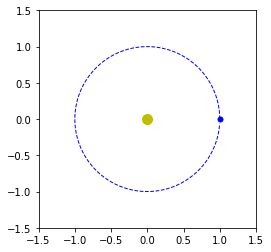

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample data: Sun and Earth coordinates over time
timesteps = 100  # Number of time steps
sun_x = np.linspace(0, 0, timesteps)  # Sun stays at the origin (0,0)
sun_y = np.linspace(0, 0, timesteps)
earth_x = np.cos(np.linspace(0, 2 * np.pi, timesteps))  # Circular orbit (example)
earth_y = np.sin(np.linspace(0, 2 * np.pi, timesteps))

# Set up the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')

# Plot elements for Sun and Earth
sun_plot, = ax.plot([], [], 'yo', markersize=10, label='Sun')
earth_plot, = ax.plot([], [], 'bo', markersize=5, label='Earth')
trajectory, = ax.plot([], [], 'b--', lw=1)

# Initialization function
def init():
    sun_plot.set_data([], [])
    earth_plot.set_data([], [])
    trajectory.set_data([], [])
    return sun_plot, earth_plot, trajectory

# Update function for animation
def update(frame):
    sun_plot.set_data(sun_x[frame], sun_y[frame])
    earth_plot.set_data(earth_x[frame], earth_y[frame])
    trajectory.set_data(earth_x[:frame], earth_y[:frame])
    return sun_plot, earth_plot, trajectory

# Create the animation
ani = FuncAnimation(fig, update, frames=timesteps, init_func=init, blit=True, interval=100)
ani.save('sun_earth_animation.gif', writer='imagemagick', fps=10)